In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import ode

In [20]:
'''
March 23rd.

the van der pol oscillator?

'''

'''
x'' - mu (1 - x  ** 2) x' + x = 0

as a system

y = x'

y' = mu ( 1- x**2) y - x

so how do I solve the van der pol oscillator?

'''

mu = 5
f = lambda t, x: [x[1], 
                  mu * (1 - x[0] ** 2) * x[1] - x[0]]

IC = [0., 1.]
t0, tf = 0., 100
nframes = 2 ** 20
from scipy.integrate import solve_ivp
soln = solve_ivp(f, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes),
                method='Radau')

# A beautiful!! table in p.167 of 'the periodic solution of 
# van der pol's equation' -- SIAM 2006
# gives high-precision values of T collected from other sources
# for integer values of eps



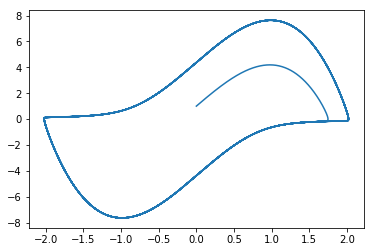

In [21]:
soln.y.shape

plt.plot(soln.y[0,:], soln.y[1,:])

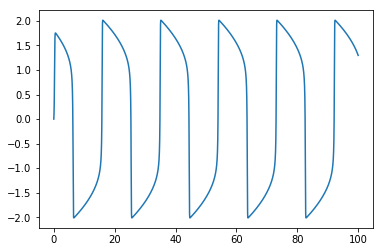

In [17]:
plt.plot(soln.t, soln.y[0,:])

In [116]:
'''
What happens when the van der pol oscillator is driven by some other
force?

'''

mu = 4.
damping_const = 4 # Is the drag force positive or negative?
f = lambda t, x: [x[1], 
                  mu * (1 - x[0] ** 2) * x[1] - x[0] - damping_const * x[1]
                 ]

IC = [0., 1.]
t0, tf = 0., 100.
nframes = 2 ** 10
soln = solve_ivp(f, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes))


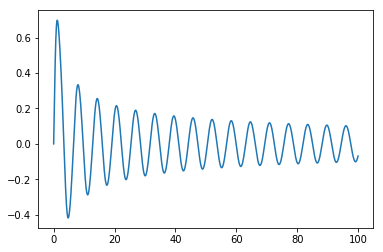

In [117]:
plt.plot(soln.t, soln.y[0,:])

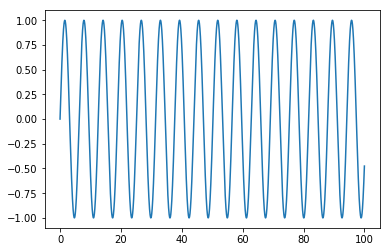

In [232]:
# spring with a damping constant
# let's solve it!

k = 1.
c = 0.0
f = lambda t, x: [x[1], 
                  - (k ** 2) * x[0]]

IC = [0., 1.]
t0, tf = 0., 100.
nframes = 2 ** 20
soln = solve_ivp(f, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes))

plt.plot(soln.t, soln.y[0,:])

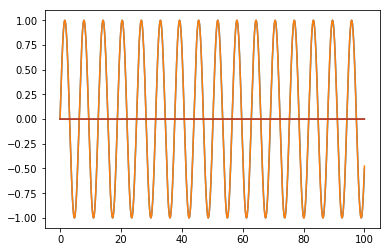

In [267]:
K = 1.
c0 = - 0.5j
c1 = - c0

f = lambda t: c0 * np.exp(1j * K * t) + c1 * np.exp(-1j * K * t)

T = np.linspace(0, 100, 2 ** 20)

Y = f(T)

plt.plot(T, np.real(Y))
plt.plot(soln.t, soln.y[0,:])

#plt.plot(T, np.imag(Y))

1j * K * (np.exp(1j * K) + np.exp(-1j * K) )

plt.plot(T, np.gradient(np.real(Y)))
plt.plot(soln.t, np.gradient(soln.y[0,:]))


In [266]:
import sympy as sp

t = sp.Symbol('t')

c0 = -.5j
c1 = .5j

Y = c0 * sp.exp(1j * K * t) + c1 * sp.exp(-1j * K * t)
dx = sp.diff(c0 * sp.exp(1j * K * t) + c1 * sp.exp(-1j * K * t))

Y.subs(t, 0)
dx.subs(t,0)

1.00000000000000

In [265]:
c0 + c1

0j

In [262]:
x = sp.Symbol('x')
tosolve = sp.diff(x * sp.exp(1j * K * t) + (-x) * sp.exp(-1j * K * t), 't').subs(t, 0)

tmp = sp.solve(tosolve - 1)
tmp

[-0.5*I]

In [263]:
c0 = - 1j * (1. / (2. * K * np.cos(K)))

tmp = sp.lambdify(x, tmp[0], 'numpy')(0)

np.allclose(tmp, c0)

False

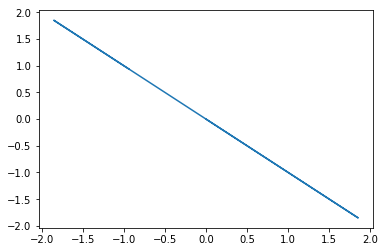

In [194]:
Ypp = np.diff(soln.y[0,:], n=2) / ((T[1] - T[0]) ** 2)

Ypp = np.diff(np.real(Y), n=2) / ((T[1] - T[0]) ** 2)


plt.plot(np.real(Y)[1:-1], Ypp) # that's fuckin' hot
#plt.plot(T, np.real(Y))

# Ok, so what did we learn today?
# We learned that using the complex-valued exponentials
# to solve for 


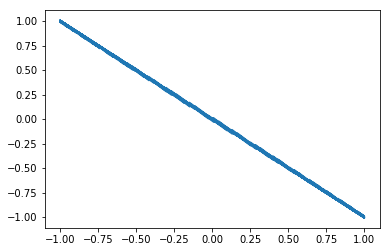

In [198]:
Ypp = np.diff(soln.y[0,:], n=2) / ((T[1] - T[0]) ** 2)
plt.plot(soln.y[0,1:-1], Ypp)


In [199]:
# wait..wtf?
# shouldn't my soln to my IVP be unique?

Y[0]

0j

In [204]:
Yp = np.gradient(np.real(Y)) / ((T[1] - T[0]) ** 1)

Yp[0]

1.8508157148754083

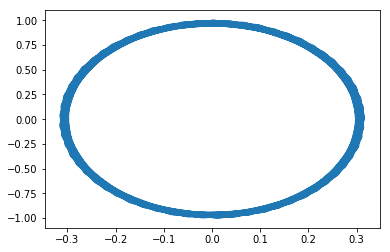

In [136]:
plt.plot(soln.y[0,:], soln.y[1,:])

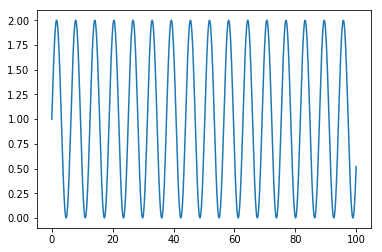

In [270]:
# A spring which has been translated to x=1
k = 1.
c = 0.0
f = lambda t, x: [x[1], 
                  - (k ** 2) * (x[0] - 1)]

IC = [1., 1.]
t0, tf = 0., 100.
nframes = 2 ** 12
soln = solve_ivp(f, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes))

plt.plot(soln.t, soln.y[0,:])

In [ ]:
# A system of coupled springs with unit masses
# and no damping!

k = 1.
c = 0.001
f = lambda t, x: [x[1], 
                  - k * x[0]]

IC = [0., 1.]
t0, tf = 0., 100.
nframes = 2 ** 10
soln = solve_ivp(f, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes))




In [4]:
np.where( soln.t >= 3 * 10.2)

soln.t[314]

print(soln.y[0][314], soln.y[0][419], soln.y[0][523], soln.y[0][627])
print(soln.y[1][314], soln.y[1][419], soln.y[1][524], soln.y[1][627])

1.9145669796096396 1.9003965850604367 1.9036491651865783 1.9068924093195885
-0.17696073710213087 -0.17919493970116163 -0.1815029392294576 -0.1781667858222436


In [7]:
from scipy.optimize import dual_annealing

func = lambda x : np.sum(x*x - 10 * np.cos(2*np.pi*x)) + 10* np.size(x)

lw = [-5.12] * 10
up = [5.12] * 10

ret = dual_annealing(func, bounds = list(zip(lw,up)), seed=123)

print(f'min is {ret.x}, {ret.fun}')



min is [-4.96083237e-09 -3.99274001e-09 -7.98265443e-09 -5.95999572e-09
 -4.00753399e-09 -5.93486573e-09 -5.42647234e-09 -1.04989045e-08
 -6.44747097e-09 -4.80338138e-09], 8.526512829121202e-14


In [30]:
data_t = soln.t
data_y = soln.y

def fit(mu):
    mu = mu # redundant
    f = lambda t, x: [x[1], 
                  mu * (1 - x[0] ** 2) * x[1] - x[0]]

    IC = [0., 1.]
    t0, tf = 0., 100.
    nframes = 2 ** 10
    
    guess = solve_ivp(f, [t0, tf], IC,
                t_eval=np.linspace(t0,tf,nframes))
    
    # compute the norm of the data : use L2 norm on x, y
    error_of_guess = np.linalg.norm( 
        np.linalg.norm(data_y - guess.y, axis=0)
    )
    
    return error_of_guess


In [33]:
fit(1.) # awesome!
fit(4.)

0.0

In [45]:
%%time

# okay, let's plug this into the dual annealing algorithm.

lower_bound = [0.]
upper_bound = [10.]
opt = dual_annealing(fit, bounds =list(zip(lower_bound, upper_bound)))
print(opt, opt.x, opt.fun)


     fun: 1.4183925324618357e-06
 message: ['Maximum number of iteration reached']
    nfev: 2171
    nhev: 0
     nit: 1000
    njev: 0
       x: array([4.]) [4.] 1.4183925324618357e-06
CPU times: user 2min 52s, sys: 89.6 ms, total: 2min 52s
Wall time: 2min 53s


In [56]:
# also, let's try the least squares optimizer

from scipy.optimize import least_squares

def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])

x0_rosenbrock = np.array([2, 2])
res_1 = least_squares(fun_rosenbrock, x0_rosenbrock, bounds=([-1,-1],[2,2]))

res_1
                      
                      

 active_mask: array([0, 0])
        cost: 0.0
         fun: array([0., 0.])
        grad: array([0., 0.])
         jac: array([[-20.00000015,  10.        ],
       [ -1.        ,   0.        ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 17
        njev: 16
  optimality: 0.0
      status: 1
     success: True
           x: array([1., 1.])

In [62]:
%%time 

#opt = dual_annealing(fit, bounds =list(zip(lower_bound, upper_bound)))
res = least_squares(fit, [0.1])

print(res, res.x, res.cost,res.fun)

 active_mask: array([0.])
        cost: 2400.624173183164
         fun: array([69.29104088])
        grad: array([-0.01506649])
         jac: array([[-0.00021744]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 14
        njev: 10
  optimality: 0.015066487618310918
      status: 2
     success: True
           x: array([-0.57304687]) [-0.57304687] 2400.624173183164 [69.29104088]
CPU times: user 425 ms, sys: 993 µs, total: 426 ms
Wall time: 451 ms


In [63]:
def gen_data(t, a, b, c, noise=0, n_outliers=0, random_state=0):
    y = a + b * np.exp(t * c)

    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 10

    return y + error

a = 0.5
b = 2.0
c = -1
t_min = 0
t_max = 10
n_points = 15

t_train = np.linspace(t_min, t_max, n_points)
y_train = gen_data(t_train, a, b, c, noise=0.1, n_outliers=3)

def fun(x, t, y):
    return x[0] + x[1] * np.exp(x[2] * t) - y

x0 = np.array([1.0, 1.0, 0.0])

In [65]:
res_lsq = least_squares(fun, x0, args=(t_train, y_train))


In [66]:
res_soft_l1 = least_squares(fun, x0, loss='soft_l1', f_scale=0.1,
                            args=(t_train, y_train))

In [67]:
res_log = least_squares(fun, x0, loss='cauchy', f_scale=0.1,
                        args=(t_train, y_train))

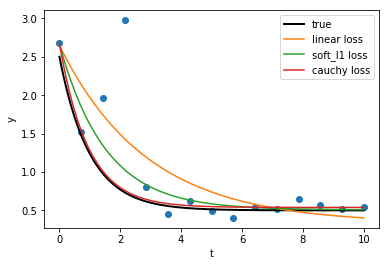

In [68]:
t_test = np.linspace(t_min, t_max, n_points * 10)
y_true = gen_data(t_test, a, b, c)
y_lsq = gen_data(t_test, *res_lsq.x)
y_soft_l1 = gen_data(t_test, *res_soft_l1.x)
y_log = gen_data(t_test, *res_log.x)

plt.plot(t_train, y_train, 'o')
plt.plot(t_test, y_true, 'k', linewidth=2, label='true')
plt.plot(t_test, y_lsq, label='linear loss')
plt.plot(t_test, y_soft_l1, label='soft_l1 loss')
plt.plot(t_test, y_log, label='cauchy loss')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# basin hopping?